# Gelişmiş NumPy

# A.1 ndarray Object Internals
    NumPy ndarray, homojen bir veri bloğunu (bitişik veya çok yönlü) çok boyutlu bir dizi nesnesi olarak yorumlamak için bir yol sağlar. Veri türü veya dtype, verilerin kayan nokta, tamsayı, boole veya bakmakta olduğumuz diğer türlerden herhangi biri olarak nasıl yorumlanacağını belirler. 
    Ndarray'i esnek kılan şeylerden biri, her dizi nesnesinin bir veri bloğu üzerinde aşamalı bir görünüm olmasıdır. Örneğin, dizi görünümünün [:: 2, :: - 1] herhangi bir veriyi nasıl kopyalamadığını merak edebilirsiniz. Bunun nedeni, ndarray'in bir bellek parçası ve bir dtype'dan daha fazlası olmasıdır; ayrıca dizinin farklı adım boyutlarıyla bellekte hareket etmesini sağlayan "adım adım" bilgisine sahiptir. Daha doğrusu, ndarray dahili olarak aşağıdakilerden oluşur.
    • Veriye işaretçi - yani RAM'deki veya bellek eşlemeli bir dosyadaki bir veri bloğu
    • Dizideki sabit boyutlu değerli hücreleri açıklayan veri türü veya dtype
    • Dizinin şeklini gösteren bir demet
    • Bir boyut boyunca bir öğeyi ilerletmek için "adım" atılacak bayt sayısını belirten tam sayılardan oluşan bir adım dizisi

    Örneğin, bir 10 × 5 dizisinin şekli (10, 5) olacaktır.

In [2]:
import numpy as np
np.ones((10, 5)).shape

(10, 5)

    Tipik bir (C sırası) 3 × 4 × 5 float64 (8 bayt) değer dizisi adımlara sahiptir (160, 40, 8) (adımların bilinmesi yararlı olabilir çünkü genel olarak belirli bir eksendeki adımlar ne kadar büyükse , bu eksen boyunca hesaplama yapmak daha maliyetli olur).

In [3]:
np.ones((3, 4, 5), dtype=np.float64).strides

(160, 40, 8)

    Tipik bir NumPy kullanıcısının dizi adımlarına ilgi duyması nadir olsa da, bunlar "sıfır kopya" dizi görünümlerinin oluşturulmasında kritik bileşendir. Adımlar negatif bile olabilir, bu da bir dizinin bellekte "geri" hareket etmesini sağlar (örneğin, obj [:: - 1] veya obj [:, :: - 1] gibi bir dilimde böyle bir durum söz konusudur).

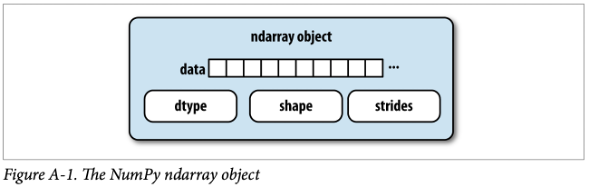

In [8]:
from IPython.display import Image
Image(filename='img/Picture86.png')

# NumPy dtype Hiyerarşisi
    Ara sıra, bir dizinin tamsayılar, kayan nokta sayıları, dizeler veya Python nesneleri içerip içermediğini kontrol etmesi gereken koda sahip olabilirsiniz. Birden fazla kayan nokta sayısı türü olduğundan (float16'dan float128'e kadar), dtype'ın bir tür listesi arasında olup olmadığını kontrol etmek çok ayrıntılı olacaktır. Neyse ki, dtype'lerde np.integer ve np.floating gibi süper sınıflar vardır ve bunlar np.issubdtype işlevi ile birlikte kullanılabilir.

In [9]:
ints = np.ones(10, dtype=np.uint16)

In [11]:
floats = np.ones(10, dtype=np.float32)

In [12]:
np.issubdtype(ints.dtype, np.integer)

True

In [13]:
np.issubdtype(floats.dtype, np.floating)

True

    type’s mro yöntemini çağırarak belirli bir dtype'ın tüm üst sınıflarını görebilirsiniz.

In [14]:
np.float64.mro()

[numpy.float64,
 numpy.floating,
 numpy.inexact,
 numpy.number,
 numpy.generic,
 float,
 object]

In [15]:
np.issubdtype(ints.dtype, np.number)

True

    Dtype hiyerarşisi ve üst-alt sınıf ilişkilerinin bir grafiği için Şekil A-2

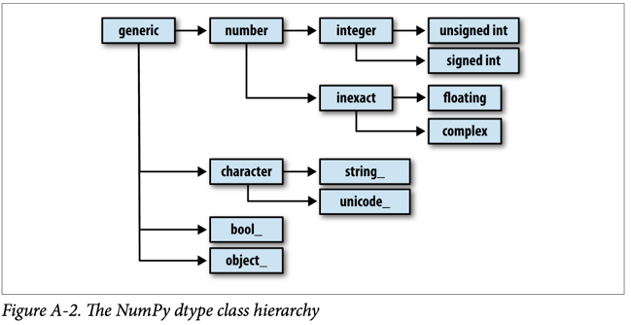

In [20]:
Image(filename='img/Picture87.png')

# A.2 Gelişmiş Dizi Manipülasyonu

# Dizileri Yeniden Şekillendirme(Reshaping Arrays)
    Çoğu durumda, herhangi bir veri kopyalamadan bir diziyi bir şekilden diğerine dönüştürebilirsiniz. Bunu yapmak için, diziyi yeniden şekillendirme örneğine yeni şekli gösteren bir demet iletin. Örneğin, bir matris halinde yeniden düzenlemek istediğimiz tek boyutlu bir değerler dizimiz olduğunu varsayalım (sonuç Şekil A-3'te gösterilmektedir).

In [17]:
arr = np.arange(8)

In [18]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [19]:
arr.reshape((4, 2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

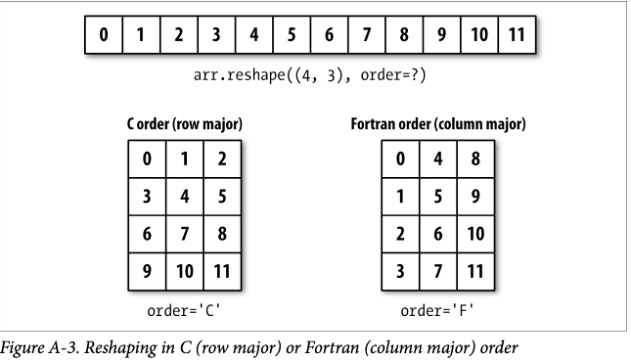

In [21]:
Image(filename='img/Picture88.png')

    Çok boyutlu bir dizi de yeniden şekillendirilebilir.

In [22]:
arr.reshape((4, 2)).reshape((2, 4))

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

    Aktarılan şekil boyutlarından biri -1 olabilir; bu durumda, o boyut için kullanılan değer verilerden çıkarılır.

In [23]:
arr = np.arange(15)

In [24]:
arr.reshape((5, -1))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

    Bir dizinin şekil özniteliği bir demet olduğundan, yeniden şekillendirmek için de iletilebilir.

In [25]:
other_arr = np.ones((3, 5))

In [26]:
other_arr.shape

(3, 5)

In [27]:
arr.reshape(other_arr.shape)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

    Tek boyutludan daha yüksek bir boyuta yeniden şekillendirmenin zıt işlemi tipik olarak düzleştirme veya açılma olarak bilinir.

In [28]:
arr = np.arange(15).reshape((5, 3))

In [29]:
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

    Sonuçtaki değerler orijinal dizide bitişikse, ravel temel değerlerin bir kopyasını üretmez. Yassılaştırma yöntemi, her zaman verilerin bir kopyasını döndürmesi dışında ravel gibi davranır.

In [30]:
arr.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

    Veriler, farklı sıralarda yeniden şekillendirilebilir veya yeniden şekillendirilebilir.

# C  Fortran Order Kıyaslaması
    NumPy, bellekteki verilerinizin düzeni üzerinde size kontrol ve esneklik sağlar. Varsayılan olarak, NumPy dizileri satır ana sırasına göre oluşturulur. Uzamsal olarak bu, iki boyutlu bir veri diziniz varsa, dizinin her satırındaki öğelerin bitişik bellek konumlarında depolandığı anlamına gelir. Satır büyük sıralamasına alternatif, sütun büyük sıralamadır; bu, her veri sütunundaki değerlerin bitişik bellek konumlarında depolandığı anlamına gelir.
    Tarihsel nedenlerden dolayı, satır ve sütun ana sırası sırasıyla C ve Fortran sırası olarak da bilinir. FORTRAN 77 dilinde, matrislerin tümü sütun temeldir.
    Reshape ve ravel gibi işlevler, dizideki verileri kullanma sırasını belirten bir sıra bağımsız değişkenini kabul eder. Bu, çoğu durumda genellikle 'C' veya 'F' olarak ayarlanır.

In [33]:
arr = np.arange(12).reshape((3, 4))

In [34]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [35]:
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [36]:
arr.ravel('F')

array([ 0,  4,  8,  1,  5,  9,  2,  6, 10,  3,  7, 11])

    İkiden fazla boyuta sahip dizileri yeniden şekillendirmek biraz kafa karıştırıcı olabilir. C ve Fortran düzeni arasındaki temel fark, boyutların yüründüğü yoldur.

    C / satır ana sırası
    Önce daha yüksek boyutları geçin (örneğin, eksen 0'a ilerlemeden önce eksen 1).
    
    Fortran / sütun ana sırası
    En son daha yüksek boyutları geçin (örneğin, eksen 1'e ilerlemeden önce eksen 0).

# Dizileri Birleştirme ve Bölme
    numpy.concatenate, dizi dizilerini (tuple, list, vb.) alır ve bunları giriş ekseni boyunca sırayla birleştirir.

In [37]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])

In [38]:
arr2 = np.array([[7, 8, 9], [10, 11, 12]])

In [39]:
np.concatenate([arr1, arr2], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [40]:
np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

    Yaygın birleştirme türleri için vstack ve hstack gibi bazı kullanışlı işlevler vardır. Önceki işlemler şu şekilde ifade edilebilirdi:

In [41]:
np.vstack((arr1, arr2))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [42]:
np.hstack((arr1, arr2))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

    split, bir diziyi bir eksen boyunca birden çok diziye böler.

In [43]:
arr = np.random.randn(5, 2)

In [44]:
arr

array([[ 1.26295214,  0.87440954],
       [-0.38438596, -0.90336778],
       [ 0.62775591, -1.15367278],
       [ 0.44059987, -0.24521833],
       [ 0.006977  ,  0.32898347]])

In [45]:
first, second, third = np.split(arr, [1, 3])

In [46]:
first

array([[1.26295214, 0.87440954]])

In [47]:
second

array([[-0.38438596, -0.90336778],
       [ 0.62775591, -1.15367278]])

In [48]:
third

array([[ 0.44059987, -0.24521833],
       [ 0.006977  ,  0.32898347]])

    Np.split'e aktarılan [1, 3] değeri, dizinin parçalara bölüneceği endeksleri belirtir.

    Tüm ilgili birleştirme ve bölme işlevlerinin bir listesi için Tablo A-1'e bakın, bunlardan bazıları yalnızca çok genel amaçlı birleştirme kolaylığı olarak sunulmuştur.

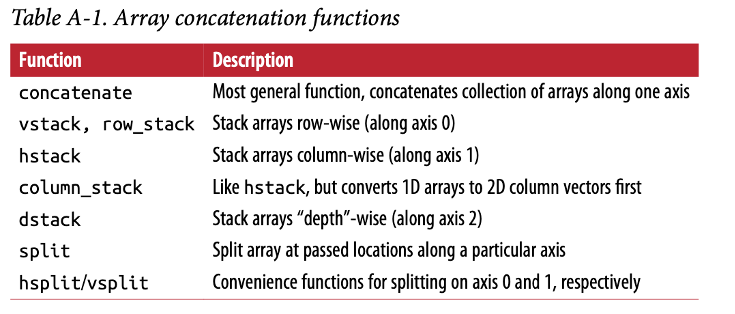

In [49]:
Image(filename='img/Picture89.png')

# İstifleme yardımcıları: r_ ve c_
    NumPy ad alanında, yığınlama dizilerini daha kısa hale getiren iki özel nesne vardır: r_ ve c_.

In [50]:
arr = np.arange(6)

In [51]:
arr1 = arr.reshape((3, 2))

In [52]:
arr2 = np.random.randn(3, 2)

In [53]:
np.r_[arr1, arr2]

array([[ 0.        ,  1.        ],
       [ 2.        ,  3.        ],
       [ 4.        ,  5.        ],
       [ 0.79683449, -0.73581472],
       [ 1.61452779, -0.23174841],
       [ 0.08537535,  0.64332375]])

In [54]:
np.c_[np.r_[arr1, arr2], arr]

array([[ 0.        ,  1.        ,  0.        ],
       [ 2.        ,  3.        ,  1.        ],
       [ 4.        ,  5.        ,  2.        ],
       [ 0.79683449, -0.73581472,  3.        ],
       [ 1.61452779, -0.23174841,  4.        ],
       [ 0.08537535,  0.64332375,  5.        ]])

    Bunlar ayrıca dilimleri dizilere çevirebilir.

In [55]:
np.c_[1:6, -10:-5]

array([[  1, -10],
       [  2,  -9],
       [  3,  -8],
       [  4,  -7],
       [  5,  -6]])

    Yinelenen Öğeler: döşeyin ve tekrarlayın
    
    Daha büyük diziler oluşturmak için dizileri yinelemek veya çoğaltmak için iki kullanışlı araç, yineleme ve döşeme işlevleridir. tekrar, bir dizideki her bir öğeyi birkaç kez çoğaltır ve daha büyük bir dizi oluşturur.

In [56]:
arr = np.arange(3)

In [57]:
arr

array([0, 1, 2])

In [58]:
arr.repeat(3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

    Varsayılan olarak, bir tamsayı geçirirseniz, her öğe bu sayıda tekrarlanacaktır. Bir tamsayı dizisi geçirirseniz, her öğe farklı sayıda tekrarlanabilir.

In [59]:
arr.repeat([2, 3, 4])

array([0, 0, 1, 1, 1, 2, 2, 2, 2])

    Çok boyutlu dizilerin elemanları belirli bir eksen boyunca tekrarlanabilir.

In [60]:
arr = np.random.randn(2, 2)

In [61]:
arr

array([[ 0.3189704 , -0.66895566],
       [ 0.89103869,  0.71390849]])

In [62]:
arr.repeat(2, axis=0)

array([[ 0.3189704 , -0.66895566],
       [ 0.3189704 , -0.66895566],
       [ 0.89103869,  0.71390849],
       [ 0.89103869,  0.71390849]])

    Hiçbir eksen geçilmezse, dizinin önce düzleştirileceğini unutmayın, bu muhtemelen istediğiniz şey değildir. Benzer şekilde, belirli bir dilimi farklı sayıda tekrarlamak için çok boyutlu bir diziyi tekrarlarken bir tamsayı dizisi geçirebilirsiniz.

In [63]:
arr.repeat([2, 3], axis=0)

array([[ 0.3189704 , -0.66895566],
       [ 0.3189704 , -0.66895566],
       [ 0.89103869,  0.71390849],
       [ 0.89103869,  0.71390849],
       [ 0.89103869,  0.71390849]])

In [64]:
arr.repeat([2, 3], axis=1)

array([[ 0.3189704 ,  0.3189704 , -0.66895566, -0.66895566, -0.66895566],
       [ 0.89103869,  0.89103869,  0.71390849,  0.71390849,  0.71390849]])

    tile ise, bir dizinin kopyalarını bir eksen boyunca istiflemek için bir kısayoldur. Görsel olarak bunu "fayans döşemek" gibi düşünebilirsiniz.

In [65]:
arr

array([[ 0.3189704 , -0.66895566],
       [ 0.89103869,  0.71390849]])

In [66]:
np.tile(arr, 2)

array([[ 0.3189704 , -0.66895566,  0.3189704 , -0.66895566],
       [ 0.89103869,  0.71390849,  0.89103869,  0.71390849]])

    İkinci argüman tiles sayısıdır; skaler ile döşeme, sütun sütun yerine satır satır yapılır. tile a yönelik ikinci argüman, "tile ın" düzenini gösteren bir demet olabilir.

In [67]:
arr

array([[ 0.3189704 , -0.66895566],
       [ 0.89103869,  0.71390849]])

In [68]:
np.tile(arr, (2, 1))

array([[ 0.3189704 , -0.66895566],
       [ 0.89103869,  0.71390849],
       [ 0.3189704 , -0.66895566],
       [ 0.89103869,  0.71390849]])

In [69]:
np.tile(arr, (3, 2))

array([[ 0.3189704 , -0.66895566,  0.3189704 , -0.66895566],
       [ 0.89103869,  0.71390849,  0.89103869,  0.71390849],
       [ 0.3189704 , -0.66895566,  0.3189704 , -0.66895566],
       [ 0.89103869,  0.71390849,  0.89103869,  0.71390849],
       [ 0.3189704 , -0.66895566,  0.3189704 , -0.66895566],
       [ 0.89103869,  0.71390849,  0.89103869,  0.71390849]])

# Fancy Indexing Equivalents: al ve koy

In [70]:
arr = np.arange(10) * 100

In [71]:
inds=[7,1,2,6]

In [72]:
arr[inds]

array([700, 100, 200, 600])

    Yalnızca tek bir eksende seçim yapmanın özel durumunda faydalı olan alternatif ndarray yöntemleri vardır.

In [73]:
arr.take(inds)

array([700, 100, 200, 600])

In [74]:
arr.put(inds, 42)

In [75]:
arr

array([  0,  42,  42, 300, 400, 500,  42,  42, 800, 900])

In [76]:
arr.put(inds, [40, 41, 42, 43])

In [77]:
arr

array([  0,  41,  42, 300, 400, 500,  43,  40, 800, 900])

In [78]:
inds=[2,0,2,1]

In [79]:
arr = np.random.randn(2, 4)

In [80]:
arr

array([[ 0.75440666,  0.76811305,  1.58588341,  1.09235958],
       [-0.63699664,  0.66305023,  0.73496467, -2.00202678]])

In [81]:
arr.take(inds, axis=1)

array([[ 1.58588341,  0.75440666,  1.58588341,  0.76811305],
       [ 0.73496467, -0.63699664,  0.73496467,  0.66305023]])

    put bir eksen bağımsız değişkenini kabul etmez, bunun yerine dizinin düzleştirilmiş (tek boyutlu, C sırası) versiyonunu indeksler. Bu nedenle, diğer eksenlerde bir dizin dizisi kullanarak öğeleri ayarlamanız gerektiğinde, genellikle en kolayı süslü indekslemeyi kullanmaktır.

# A.3 Broadcasting
    Yayın, farklı şekillerdeki diziler arasında aritmetiğin nasıl çalıştığını açıklar. Güçlü bir özellik olabilir, ancak deneyimli kullanıcılar için bile kafa karışıklığına neden olabilir. En basit yayın örneği, bir skaler değeri birleştirirken  bir dizi ile ortaya çıkar.

In [2]:
import numpy as np
arr = np.arange(5)

In [3]:
arr * 4

array([ 0,  4,  8, 12, 16])

    Burada 4 skaler değerinin çarpma işlemindeki diğer tüm öğelere yayınlandığını söylüyoruz.

    Örneğin, bir dizinin her bir sütununu sütun ortalamalarını çıkararak küçültebiliriz.

In [5]:
arr = np.random.randn(4, 3)

In [6]:
arr.mean(0)

array([-0.10262695,  0.66132823, -0.59804343])

In [7]:
demeaned = arr - arr.mean(0)

In [8]:
demeaned

array([[-1.01876925,  0.62888733, -1.07511455],
       [-0.10639473,  0.30507536, -0.19811288],
       [ 1.55251509, -0.37169759,  0.59968121],
       [-0.42735111, -0.56226511,  0.67354621]])

In [9]:
demeaned.mean(0)

array([ 2.77555756e-17, -2.77555756e-17,  2.77555756e-17])

    Bu işlemin bir açıklaması için Şekil A-4'e bakın. Satırları bir yayın işlemi olarak küçültmek biraz daha özen gerektirir. Neyse ki, bir dizinin herhangi bir boyutunda potansiyel olarak daha düşük boyutlu değerleri yayınlamak (iki boyutlu bir dizinin her bir sütunundan satır ortalamasını çıkarmak gibi).

    Broadcasting Kuralı
    Her bir son boyut için (yani, sondan başlayarak) eksen uzunlukları eşleşiyorsa veya uzunluklardan biri 1 ise, yayın için iki dizi uyumludur. Eksik veya uzunluk 1 boyutları üzerinden yayın gerçekleştirilir.

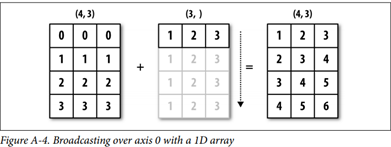

In [10]:
from IPython.display import Image
Image(filename='img/Picture90.png')

    Deneyimli bir NumPy kullanıcısı olarak bile, yayın kuralı hakkında düşünürken sık sık kendimi duraklatmak ve bir diyagram çizmek zorunda buluyorum. Son örneği düşünün ve bunun yerine her satırdan ortalama değeri çıkarmak istediğimizi varsayalım. Arr.mean (0) 3 uzunluğa sahip olduğundan, eksen 0 boyunca yayın için uyumludur çünkü son dizi boyut 3'tür ve bu nedenle eşleşir. Kurallara göre, eksen 1'den çıkarmak için (yani, her satırdan satır ortalamasını çıkarmak), daha küçük dizinin şekli olmalıdır.

In [11]:
arr

array([[-1.12139619e+00,  1.29021556e+00, -1.67315797e+00],
       [-2.09021671e-01,  9.66403586e-01, -7.96156307e-01],
       [ 1.44988814e+00,  2.89630643e-01,  1.63778813e-03],
       [-5.29978059e-01,  9.90631235e-02,  7.55027864e-02]])

In [12]:
row_means = arr.mean(1)

In [14]:
row_means.shape

(4,)

In [15]:
row_means.reshape((4, 1))

array([[-0.5014462 ],
       [-0.0129248 ],
       [ 0.58038552],
       [-0.11847072]])

In [16]:
demeaned = arr - row_means.reshape((4, 1))

In [17]:
demeaned.mean(1)

array([-1.48029737e-16,  0.00000000e+00,  0.00000000e+00, -9.25185854e-18])

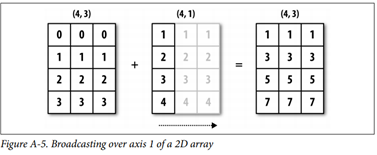

In [18]:
Image(filename='img/Picture91.png')

    Başka bir örnek için Şekil A-6'ya bakın, bu kez eksen 0 boyunca üç boyutlu bir diziye iki boyutlu bir dizi ekliyoruz.

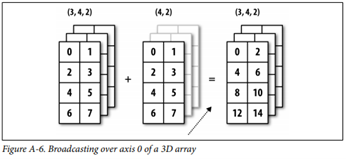

In [19]:
Image(filename='img/Picture92.png')

# Diğer Eksenler Üzerinden Broadcasting
    Daha yüksek boyutlu dizilerle yayın yapmak daha da kafa karıştırıcı görünebilir, ancak bu gerçekten kurallara uymaktır. Aksi takdirde, şuna benzer bir hata alırsınız.

In [20]:
arr - arr.mean(1)

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

    Eksen 0 dışındaki eksenler boyunca daha düşük boyutlu bir dizi ile aritmetik bir işlem gerçekleştirmek oldukça yaygındır. Yayın kuralına göre, "yayın boyutları" küçük dizide 1 olmalıdır. Burada gösterilen satır küçültme örneğinde bu, sırayı yeniden şekillendirmek, şekil olmak anlamına gelir (4, 1) (4,) yerine.

In [21]:
arr - arr.mean(1).reshape((4, 1))

array([[-0.61994999,  1.79166176, -1.17171177],
       [-0.19609687,  0.97932838, -0.78323151],
       [ 0.86950262, -0.29075488, -0.57874774],
       [-0.41150734,  0.21753384,  0.1939735 ]])

    Üç boyutlu durumda, üç boyuttan herhangi biri üzerinden yayın yapmak yalnızca veriyi şekil uyumlu olacak şekilde yeniden şekillendirme meselesidir. Şekil A-7, üç boyutlu bir dizinin her bir ekseni üzerinde yayınlamak için gereken şekilleri güzel bir şekilde görselleştirir.

    Bu nedenle yaygın bir sorun, özellikle yayınlama amaçları için uzunluk 1 olan yeni bir eksen eklemeye ihtiyaç duyulmasıdır. Yeniden şekillendirmeyi kullanmak bir seçenektir, ancak bir eksen eklemek, yeni şekli gösteren bir demet oluşturmayı gerektirir. Bu genellikle sıkıcı bir egzersiz olabilir. Bu nedenle NumPy dizileri, indeksleme yoluyla yeni eksenler eklemek için özel bir sözdizimi sunar. Yeni ekseni eklemek için özel np.newaxis niteliğini "tam" dilimlerle birlikte kullanırız.

In [22]:
arr = np.zeros((4, 4))

In [23]:
arr_3d = arr[:, np.newaxis, :]

In [24]:
arr_3d.shape

(4, 1, 4)

In [25]:
arr_1d = np.random.normal(size=3)

In [26]:
arr_1d[:, np.newaxis]

array([[1.02756759],
       [0.77335906],
       [0.46256821]])

In [27]:
arr_1d[np.newaxis, :]

array([[1.02756759, 0.77335906, 0.46256821]])

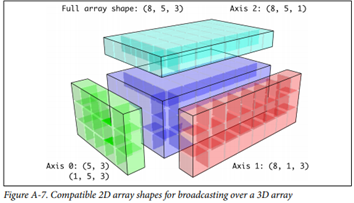

In [28]:
Image(filename='img/Picture93.png')

    Bu nedenle, üç boyutlu bir dizimiz olsaydı ve 2. ekseni küçültmek isteseydik, şunu yazmamız gerekirdi:

In [29]:
arr = np.random.randn(3, 4, 5)

In [30]:
depth_means = arr.mean(2)

In [31]:
depth_means

array([[-0.80026618, -0.24680539, -0.34028323, -1.2243451 ],
       [-0.17673106, -0.23526429, -0.13232257,  0.67924317],
       [-0.27754829, -0.41712387,  0.04067293, -0.11665971]])

In [32]:
 depth_means.shape

(3, 4)

In [33]:
demeaned = arr - depth_means[:, :, np.newaxis]

In [34]:
demeaned.mean(2)

array([[-4.44089210e-17,  2.22044605e-17,  0.00000000e+00,
         2.22044605e-17],
       [-2.22044605e-17, -8.88178420e-17,  0.00000000e+00,
        -4.44089210e-17],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.11022302e-17]])

    Performanstan ödün vermeden bir ekseni küçültmenin genellemenin bir yolu vardır.

In [36]:
def demean_axis(arr, axis=0):
    means = arr.mean(axis)
    # Bu, [:,:, np.newaxis] gibi şeyleri N boyuta geneller
    indexer = [slice(None)] * arr.ndim
    indexer[axis] = np.newaxis
    return arr - means[indexer]

# Dizi Değerlerini Broadcasting e Göre Ayarlama
    Aritmetik işlemleri yöneten aynı yayın kuralı, dizi indeksleme yoluyla değerlerin ayarlanması için de geçerlidir. Basit bir durumda, aşağıdaki gibi şeyler yapabiliriz:

In [37]:
arr = np.zeros((4, 3))

In [38]:
arr[:] = 5

In [39]:
arr

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

    Bununla birlikte, dizinin sütunlarına yerleştirmek istediğimiz tek boyutlu bir değerler dizimiz varsa, şekil uyumlu olduğu sürece bunu yapabiliriz:

In [40]:
col = np.array([1.28, -0.42, 0.44, 1.6])

In [41]:
arr[:] = col[:, np.newaxis]

In [42]:
arr

array([[ 1.28,  1.28,  1.28],
       [-0.42, -0.42, -0.42],
       [ 0.44,  0.44,  0.44],
       [ 1.6 ,  1.6 ,  1.6 ]])

In [43]:
arr[:2] = [[-1.37], [0.509]]

In [44]:
arr

array([[-1.37 , -1.37 , -1.37 ],
       [ 0.509,  0.509,  0.509],
       [ 0.44 ,  0.44 ,  0.44 ],
       [ 1.6  ,  1.6  ,  1.6  ]])

# A.4 Gelişmiş ufunc Kullanımı
    Birçok NumPy kullanıcısı yalnızca evrensel işlevler tarafından sağlanan hızlı öğe bazlı işlemlerden yararlanırken, bazen döngüler olmadan daha kısa kod yazmanıza yardımcı olabilecek bir dizi ek özellik vardır.

ufunc Instance Methods
    
    NumPy'nin ikili ufunc'larının her biri, belirli türdeki özel vektörleştirilmiş işlemleri gerçekleştirmek için özel yöntemlere sahiptir. Bunlar Tablo A-2'de özetlenmiştir, ancak nasıl çalıştıklarını göstermek için birkaç somut örnek vereceğim.

    reduce, tek bir diziyi alır ve bir dizi ikili işlem gerçekleştirerek, isteğe bağlı olarak bir eksen boyunca değerlerini toplar. Örneğin, bir dizideki öğeleri toplamanın alternatif bir yolu, np.add.reduce kullanmaktır.

In [45]:
arr = np.arange(10)

In [46]:
np.add.reduce(arr)

45

In [47]:
arr.sum()

45

    Başlangıç değeri (toplama için 0) ufunc'a bağlıdır. Bir eksen geçilirse, küçültme o eksen boyunca gerçekleştirilir. Bu, belirli türdeki soruları kısa ve öz bir şekilde yanıtlamanıza olanak tanır. Daha az önemsiz bir örnek olarak, bir dizinin her satırındaki değerlerin sıralı olup olmadığını kontrol etmek için np.logical_and kullanabiliriz.

In [48]:
np.random.seed(12346) # tekrarlanabilirlik için

In [49]:
arr = np.random.randn(5, 5)

In [50]:
arr[::2].sort(1) # birkaç satırı sırala

In [51]:
arr[:, :-1] < arr[:, 1:]

array([[ True,  True,  True,  True],
       [False,  True, False, False],
       [ True,  True,  True,  True],
       [ True, False,  True,  True],
       [ True,  True,  True,  True]])

In [52]:
np.logical_and.reduce(arr[:, :-1] < arr[:, 1:], axis=1)

array([ True, False,  True, False,  True])

    Logical_and.reduce öğesinin all yöntemine eşdeğer olduğunu unutmayın.

    accumulate , cumsum toplamla ilişkili olduğu gibi azaltmakla ilgilidir. Ara "accumulated" değerlerle aynı boyutta bir dizi oluşturur.

In [53]:
arr = np.arange(15).reshape((3, 5))

In [54]:
np.add.accumulate(arr, axis=1)

array([[ 0,  1,  3,  6, 10],
       [ 5, 11, 18, 26, 35],
       [10, 21, 33, 46, 60]], dtype=int32)

    output, iki dizi arasında ikili bir çapraz çarpım gerçekleştirir.

In [55]:
arr = np.arange(3).repeat([1, 2, 2])

In [56]:
arr

array([0, 1, 1, 2, 2])

In [58]:
np.multiply.outer(arr, np.arange(5))

array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 2, 4, 6, 8],
       [0, 2, 4, 6, 8]])

    output çıktısı, girdilerin boyutlarının toplamı olan bir boyuta sahip olacaktır.

In [59]:
x, y = np.random.randn(3, 4), np.random.randn(5)

In [60]:
result = np.subtract.outer(x, y)

In [61]:
result.shape

(3, 4, 5)

    Son yöntem olan indirgeme yöntemi, özünde dizi dilimlerinin bir araya toplandığı bir dizi gruplama işlemi olan "yerel küçültme" gerçekleştirir. Değerlerin nasıl bölüneceğini ve toplanacağını gösteren bir dizi "bin edges" kabul eder.

In [62]:
arr = np.arange(10)

In [63]:
np.add.reduceat(arr, [0, 5, 8])

array([10, 18, 17], dtype=int32)

    Sonuçlar arr [0: 5], arr [5: 8] ve arr [8:] üzerinde gerçekleştirilen indirimlerdir (burada toplamlar). Diğer yöntemlerde olduğu gibi, bir eksen bağımsız değişkeni iletebilirsiniz.

In [65]:
arr = np.multiply.outer(np.arange(4), np.arange(5))

In [66]:
arr

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12]])

In [67]:
np.add.reduceat(arr, [0, 2, 4], axis=1)

array([[ 0,  0,  0],
       [ 1,  5,  4],
       [ 2, 10,  8],
       [ 3, 15, 12]], dtype=int32)

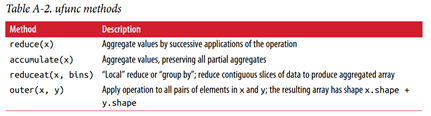

In [68]:
Image(filename='img/Picture94.png')

# Python'da Yeni Ufunclar Yazma
    Kendi NumPy ufunc'larınızı oluşturmak için bir dizi tesis vardır. En genel olanı NumPy C API'sini kullanmaktır, ancak bu, bu kitabın kapsamı dışındadır. Bu bölümde, saf Python ufunclarına bakacağız.

    numpy.frompyfunc, girdi ve çıktıların sayısı için bir belirtimle birlikte bir Python işlevini kabul eder. Örneğin, öğe bazında ekleyen basit bir işlev şu şekilde belirtilir:

In [69]:
def add_elements(x, y):
    return x + y

In [70]:
add_them = np.frompyfunc(add_elements, 2, 1)

In [71]:
add_them(np.arange(8), np.arange(8))

array([0, 2, 4, 6, 8, 10, 12, 14], dtype=object)

    Frompyfunc kullanılarak oluşturulan işlevler, her zaman uygun olmayan Python nesnelerinin dizilerini döndürür. Neyse ki, çıktı türünü belirlemenize izin veren alternatif (ancak biraz daha az özellikli) bir işlev olan numpy.vectorize vardır.

In [72]:
add_them = np.vectorize(add_elements, otypes=[np.float64])

In [73]:
add_them(np.arange(8), np.arange(8))

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.])

    Bu işlevler ufunc benzeri işlevler yaratmanın bir yolunu sağlar, ancak çok yavaştırlar çünkü her bir öğeyi hesaplamak için bir Python işlev çağrısı gerektirirler, bu NumPy’nin C tabanlı ufunc döngülerinden çok daha yavaştır.

In [74]:
arr = np.random.randn(10000)

In [75]:
%timeit add_them(arr, arr)

2.1 ms ± 273 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [76]:
%timeit np.add(arr, arr)

4.17 µs ± 361 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# A.5 Yapılandırılmış ve Kayıt Dizileri
    Şimdiye kadar ndarray'in homojen bir veri kabı olduğunu fark etmiş olabilirsiniz; yani, her bir öğenin dtype tarafından belirlenen aynı sayıda baytı kapladığı bir bellek bloğunu temsil eder. Yüzeyde bu, heterojen veya tablo benzeri verileri temsil etmenize izin vermiyor gibi görünüyor. Yapılandırılmış bir dizi, her bir öğenin C'deki bir yapıyı (dolayısıyla "yapılandırılmış" adı) veya birden çok adlandırılmış alana sahip bir SQL tablosundaki bir satırı temsil ettiği düşünülebilecek bir ndarray'dir.

In [2]:
import numpy as np
dtype = [('x', np.float64), ('y', np.int32)]

In [3]:
sarr = np.array([(1.5, 6), (np.pi, -2)], dtype=dtype)

In [4]:
sarr

array([(1.5       ,  6), (3.14159265, -2)],
      dtype=[('x', '<f8'), ('y', '<i4')])

    Yapılandırılmış bir dtype belirlemenin birkaç yolu vardır (çevrimiçi NumPy belgesine bakın). Tipik bir yol, (alan_adı, alan_verisi_türü) ile demetler listesidir.
    Şimdi, dizinin elemanları, elemanlarına bir sözlük gibi erişilebilen tuple benzeri nesnelerdir.

In [5]:
sarr[0]

(1.5, 6)

In [6]:
sarr[0]['y']

6

    Alan adları, dtype.names özniteliğinde saklanır. Yapılandırılmış dizideki bir alana eriştiğinizde, veriler üzerinde adım adım bir görünüm döndürülür, böylece hiçbir şey kopyalanmaz.

In [7]:
sarr['x']

array([1.5       , 3.14159265])

# İç içe geçmiş tipler ve Çok Boyutlu Alanlar
    Yapılandırılmış bir dtype belirtirken, ek olarak bir şekil (int veya tuple olarak) iletebilirsiniz.

In [8]:
dtype = [('x', np.int64, 3), ('y', np.int32)]

In [9]:
arr = np.zeros(4, dtype=dtype)

In [10]:
arr

array([([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0)],
      dtype=[('x', '<i8', (3,)), ('y', '<i4')])

    Bu durumda, x alanı artık her kayıt için 3 uzunluğunda bir diziyi ifade eder.

In [11]:
arr[0]['x']

array([0, 0, 0], dtype=int64)

    Uygun bir şekilde, arr ['x'] 'e erişmek, önceki örneklerde olduğu gibi tek boyutlu bir dizi yerine iki boyutlu bir dizi döndürür.

In [12]:
arr['x']

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int64)

    Bu, daha karmaşık, iç içe geçmiş yapıları bir dizide tek bir bellek bloğu olarak ifade etmenizi sağlar. Daha karmaşık yapılar oluşturmak için dtype'ları da iç içe yerleştirebilirsiniz. İşte bir örnek:

In [13]:
dtype = [('x', [('a', 'f8'), ('b', 'f4')]), ('y', np.int32)]

In [14]:
data = np.array([((1, 2), 5), ((3, 4), 6)], dtype=dtype)

In [15]:
data['x']

array([(1., 2.), (3., 4.)], dtype=[('a', '<f8'), ('b', '<f4')])

In [16]:
data['y']

array([5, 6])

In [17]:
data['x']['a']

array([1., 3.])

    Pandas DataFrame, hiyerarşik indekslemeye benzer olsa da, bu özelliği doğrudan desteklemez.

# Neden Yapılandırılmış Diziler Kullanılır?
    Örneğin bir panda DataFrame ile karşılaştırıldığında, NumPy yapısal dizileri nispeten düşük seviyeli bir araçtır. Bir bellek bloğunu, rastgele karmaşık iç içe geçmiş sütunlara sahip bir tablo yapısı olarak yorumlamak için bir yol sağlarlar. Dizideki her öğe bellekte sabit sayıda bayt olarak temsil edildiğinden, yapılandırılmış diziler diske ve diske (bellek haritaları dahil) veri yazmak, ağ üzerinden taşımak ve diğer bu tür kullanımlar için çok hızlı ve verimli bir yol sağlar. Yapılandırılmış diziler için başka bir yaygın kullanım olarak, veri dosyalarını sabit uzunlukta kayıt bayt akışları olarak yazmak, verileri endüstrideki eski sistemlerde yaygın olarak bulunan C ve C ++ kodunda serileştirmenin yaygın bir yoludur. Dosyanın biçimi bilindiği sürece (her kaydın boyutu ve her öğenin sırası, bayt boyutu ve veri türü), veriler np.fromfile ile belleğe okunabilir. Bunun gibi özel kullanımlar bu kitabın kapsamı dışındadır, ancak bu tür şeylerin mümkün olduğunu bilmeye değer.

# A.6 Sıralama Hakkında Daha Fazla Bilgi
    Python’un yerleşik listesi gibi, ndarray sıralama örneği yöntemi de yerinde sıralamadır, yani dizi içeriği yeni bir dizi oluşturmadan yeniden düzenlenir.

In [18]:
arr = np.random.randn(6)

In [19]:
arr.sort()

In [20]:
arr

array([-0.6592693 , -0.54913708,  0.11702617,  0.12482565,  0.52495146,
        0.8050308 ])

    Dizileri yerinde sıralarken, dizi farklı bir ndarray üzerinde bir görünümse, orijinal dizinin değiştirileceğini unutmayın.

In [21]:
arr = np.random.randn(3, 5)

In [22]:
arr

array([[ 1.70464274, -0.64193199, -0.30126109, -0.18956835,  2.7474241 ],
       [-1.34648997,  0.88614509,  0.75290673,  2.81032574, -0.85219139],
       [ 0.01253846, -0.78653245, -1.45624071, -0.21058634,  0.12610623]])

In [23]:
arr[:, 0].sort() # İlk sütun değerlerini yerinde sıralama

In [24]:
arr

array([[-1.34648997, -0.64193199, -0.30126109, -0.18956835,  2.7474241 ],
       [ 0.01253846,  0.88614509,  0.75290673,  2.81032574, -0.85219139],
       [ 1.70464274, -0.78653245, -1.45624071, -0.21058634,  0.12610623]])

    Öte yandan numpy.sort, bir dizinin yeni, sıralanmış bir kopyasını oluşturur. Aksi takdirde, ndarray.sort ile aynı bağımsız değişkenleri (tür gibi) kabul eder.

In [25]:
arr = np.random.randn(5)

In [26]:
arr

array([-0.95873777, -1.534479  ,  1.12872424, -1.51134213, -1.0613957 ])

In [27]:
np.sort(arr)

array([-1.534479  , -1.51134213, -1.0613957 , -0.95873777,  1.12872424])

In [28]:
arr

array([-0.95873777, -1.534479  ,  1.12872424, -1.51134213, -1.0613957 ])

    Bu sıralama yöntemlerinin tümü, veri bölümlerini geçirilen eksen boyunca bağımsız olarak sıralamak için bir eksen bağımsız değişkeni alır.

In [29]:
arr = np.random.randn(3, 5)

In [30]:
arr

array([[ 0.02850531,  0.95235365,  1.89928808,  1.30244507, -0.58103664],
       [ 1.15788742,  0.9562647 ,  1.15018941,  1.0998472 , -0.07668368],
       [ 0.07843286, -0.86457295,  1.34462476,  0.56214941,  0.38815793]])

In [31]:
arr.sort(axis=1)

In [32]:
arr

array([[-0.58103664,  0.02850531,  0.95235365,  1.30244507,  1.89928808],
       [-0.07668368,  0.9562647 ,  1.0998472 ,  1.15018941,  1.15788742],
       [-0.86457295,  0.07843286,  0.38815793,  0.56214941,  1.34462476]])

    Sıralama yöntemlerinden hiçbirinin azalan düzende sıralama seçeneğine sahip olmadığını fark edebilirsiniz. Bu pratikte bir sorundur, çünkü dizi dilimleme görünümler üretir, dolayısıyla bir kopya üretmez veya herhangi bir hesaplama işi gerektirmez. Çoğu Python kullanıcısı, bir liste değerleri için [:: - 1] değerlerinin bir listeyi ters sırada döndürdüğü "hileye" aşinadır. Aynısı ndarrays için de geçerlidir.

In [33]:
arr[:, ::-1]

array([[ 1.89928808,  1.30244507,  0.95235365,  0.02850531, -0.58103664],
       [ 1.15788742,  1.15018941,  1.0998472 ,  0.9562647 , -0.07668368],
       [ 1.34462476,  0.56214941,  0.38815793,  0.07843286, -0.86457295]])

# Dolaylı Türler: argsort ve lexsort
    Veri analizinde, veri kümelerini bir veya daha fazla anahtarla yeniden sıralamanız gerekebilir. Örneğin, bazı öğrencilerle ilgili bir veri tablosunun soyadına ve ardından ada göre sıralanması gerekebilir. Bu, dolaylı bir sıralama örneğidir. Bir anahtar veya anahtarlar (bir değerler dizisi veya birden çok değer dizisi) verildiğinde, verileri sıralı sırayla nasıl yeniden sıralayacağınızı söyleyen bir tamsayı dizini dizisi elde etmek istersiniz (bunlara ortak olarak dizin oluşturucular olarak atıfta bulunuyorum). Bunun için iki yöntem argsort ve numpy.lexsort'tur. Örnek olarak:

In [34]:
values = np.array([5, 0, 1, 3, 2])

In [35]:
indexer = values.argsort()

In [36]:
indexer

array([1, 2, 4, 3, 0], dtype=int64)

In [37]:
values[indexer]

array([0, 1, 2, 3, 5])

    Daha karmaşık bir örnek olarak, bu kod iki boyutlu bir diziyi ilk satırına göre yeniden sıralar.

In [38]:
arr = np.random.randn(3, 5)

In [39]:
arr[0] = values

In [40]:
arr

array([[ 5.        ,  0.        ,  1.        ,  3.        ,  2.        ],
       [-0.10161081,  1.66925465, -0.03679411,  0.47800524,  0.35450598],
       [-0.23366614,  2.02017718, -0.36370545, -1.07748509, -0.8933173 ]])

In [41]:
arr[:, arr[0].argsort()]

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  5.        ],
       [ 1.66925465, -0.03679411,  0.35450598,  0.47800524, -0.10161081],
       [ 2.02017718, -0.36370545, -0.8933173 , -1.07748509, -0.23366614]])

    lexsort, argsort'a benzer, ancak birden çok anahtar dizisinde dolaylı bir sözlükbilimsel sıralama gerçekleştirir. Ad ve soyadlarına göre tanımlanan bazı verileri sıralamak istediğimizi varsayalım.

In [43]:
first_name = np.array(['Bob', 'Jane', 'Steve', 'Bill', 'Barbara'])

In [44]:
last_name = np.array(['Jones', 'Arnold', 'Arnold', 'Jones', 'Walters'])

In [45]:
sorter = np.lexsort((first_name, last_name))

In [46]:
sorter

array([1, 2, 3, 0, 4], dtype=int64)

In [47]:
zip(last_name[sorter], first_name[sorter])

    lexsort, onu ilk kullandığınızda biraz kafa karıştırıcı olabilir, çünkü verileri sıralamak için kullanılan anahtarların sırası geçirilen son diziyle başlar. Burada last_name addan önce kullanılmıştır.

    Series ve DataFrame’in sort_values yöntemi gibi pandas yöntemleri bu işlevlerin varyantları ile uygulanır (ayrıca eksik değerleri hesaba katın).

# Alternatif Sıralama Algoritmaları
    Kararlı bir sıralama algoritması, eşit öğelerin göreceli konumunu korur. Bu, özellikle göreli sıralamanın anlamlı olduğu dolaylı türlerde önemli olabilir.

In [48]:
values = np.array(['2:first', '2:second', '1:first', '1:second',
                   '1:third'])

In [49]:
key = np.array([2, 2, 1, 1, 1])

In [50]:
indexer = key.argsort(kind='mergesort')

In [51]:
indexer

array([2, 3, 4, 0, 1], dtype=int64)

In [52]:
values.take(indexer)

array(['1:first', '1:second', '1:third', '2:first', '2:second'],
      dtype='<U8')

    Mevcut tek kararlı sıralama, garantili O (n log n) performansı (karmaşıklık buffları için) olan, ancak performansı varsayılan hızlı sıralama yönteminden ortalama olarak daha kötü olan birleştirme sıralamasıdır. Mevcut yöntemlerin ve bunların göreceli performanslarının (ve performans garantilerinin) bir özeti için Tablo A-3'e bakın. Bu, çoğu kullanıcının düşünmek zorunda kalacağı bir şey değildir, ancak orada olduğunu bilmek yararlıdır.

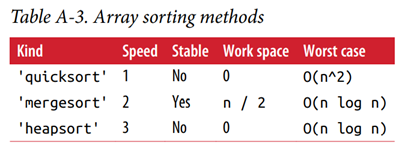

In [54]:
from IPython.display import Image
Image(filename='img/Picture95.png')

# Dizileri Kısmen Sıralama
    Sıralama hedeflerinden biri, bir dizideki en büyük veya en küçük öğeleri belirlemek olabilir. NumPy, bir diziyi k. En küçük öğe etrafında bölümlemek için optimize edilmiş yöntemler, numpy.partition ve np.argpartition'a sahiptir.

In [55]:
np.random.seed(12345)

In [56]:
arr = np.random.randn(20)

In [57]:
arr

array([-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057,
        1.39340583,  0.09290788,  0.28174615,  0.76902257,  1.24643474,
        1.00718936, -1.29622111,  0.27499163,  0.22891288,  1.35291684,
        0.88642934, -2.00163731, -0.37184254,  1.66902531, -0.43856974])

In [58]:
np.partition(arr, 3)

array([-2.00163731, -1.29622111, -0.5557303 , -0.51943872, -0.37184254,
       -0.43856974, -0.20470766,  0.28174615,  0.76902257,  0.47894334,
        1.00718936,  0.09290788,  0.27499163,  0.22891288,  1.35291684,
        0.88642934,  1.39340583,  1.96578057,  1.66902531,  1.24643474])

    Bölümü (arr, 3) çağırdıktan sonra, sonuçtaki ilk üç öğe belirli bir sıraya sahip olmayan en küçük üç değerdir. numpy.argpartition, numpy.arg sıralamasına benzer şekilde, verileri eşdeğer sıraya göre yeniden düzenleyen dizinleri döndürür.

In [59]:
indices = np.argpartition(arr, 3)

In [60]:
indices

array([16, 11,  3,  2, 17, 19,  0,  7,  8,  1, 10,  6, 12, 13, 14, 15,  5,
        4, 18,  9], dtype=int64)

In [61]:
arr.take(indices)

array([-2.00163731, -1.29622111, -0.5557303 , -0.51943872, -0.37184254,
       -0.43856974, -0.20470766,  0.28174615,  0.76902257,  0.47894334,
        1.00718936,  0.09290788,  0.27499163,  0.22891288,  1.35291684,
        0.88642934,  1.39340583,  1.96578057,  1.66902531,  1.24643474])

# numpy.searchsorted: Sıralanmış Bir Dizide Öğeleri Bulma
    searchsorted, sıralanmış bir dizide ikili arama gerçekleştiren ve sıralılığı korumak için değerin girilmesi gereken dizideki konumu döndüren bir dizi yöntemidir.

In [62]:
arr = np.array([0, 1, 7, 12, 15])

In [63]:
arr.searchsorted(9)

3

    Ayrıca bir dizi dizini geri almak için bir dizi değer iletebilirsiniz.

In [64]:
arr.searchsorted([0, 8, 11, 16])

array([0, 3, 3, 5], dtype=int64)

    Searchsorted'ın 0 öğesi için 0 döndürdüğünü fark etmiş olabilirsiniz. Bunun nedeni, varsayılan davranışın dizini eşit değerlerden oluşan bir grubun sol tarafında döndürmesidir.

In [65]:
arr = np.array([0, 0, 0, 1, 1, 1, 1])

In [66]:
arr.searchsorted([0, 1])

array([0, 3], dtype=int64)

In [67]:
arr.searchsorted([0, 1], side='right')

array([3, 7], dtype=int64)

    Searchsorted'in başka bir uygulaması olarak, 0 ile 10.000 arasında bir değerler dizimiz ve verileri binlemek için kullanmak istediğimiz ayrı bir "bölüm kenarları" dizimiz olduğunu varsayalım.

In [68]:
data = np.floor(np.random.uniform(0, 10000, size=50))

In [69]:
bins = np.array([0, 100, 1000, 5000, 10000])

In [70]:
data

array([9940., 6768., 7908., 1709.,  268., 8003., 9037.,  246., 4917.,
       5262., 5963.,  519., 8950., 7282., 8183., 5002., 8101.,  959.,
       2189., 2587., 4681., 4593., 7095., 1780., 5314., 1677., 7688.,
       9281., 6094., 1501., 4896., 3773., 8486., 9110., 3838., 3154.,
       5683., 1878., 1258., 6875., 7996., 5735., 9732., 6340., 8884.,
       4954., 3516., 7142., 5039., 2256.])

    Daha sonra, her veri noktasının hangi aralığa ait olduğu hakkında bir etiket elde etmek için (burada 1, grup [0, 100 anlamına gelir)), arama sıralı kullanabiliriz.

In [71]:
labels = bins.searchsorted(data)

In [72]:
labels

array([4, 4, 4, 3, 2, 4, 4, 2, 3, 4, 4, 2, 4, 4, 4, 4, 4, 2, 3, 3, 3, 3,
       4, 3, 4, 3, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4,
       4, 3, 3, 4, 4, 3], dtype=int64)

    Bu, pandas groupby'iyle birleştirildiğinde, verileri bölmek için kullanılabilir.

In [74]:
import pandas as pd
pd.Series(data).groupby(labels).mean()

2     498.000000
3    3064.277778
4    7389.035714
dtype: float64

# A.7 Numba ile Hızlı NumPy İşlevleri Yazma
    Numba, CPU'lar, GPU'lar veya diğer donanımları kullanarak NumPy benzeri veriler için hızlı işlevler oluşturan açık kaynaklı bir projedir. Python kodunu derlenmiş makine koduna çevirmek için LLVM Projesini kullanır.

    Numba'yı tanıtmak için, bir for döngüsü kullanarak (x - y) .mean () ifadesini hesaplayan saf bir Python işlevini düşünelim:

In [75]:
import numpy as np

In [76]:
def mean_distance(x, y):
    nx = len(x)
    result = 0.0
    count = 0
    for i in range(nx):
        result += x[i] - y[i]
        count += 1
        return result / count

    Bu işlev çok yavaştır.

In [78]:
x = np.random.randn(10000000)

In [79]:
y = np.random.randn(10000000)

In [80]:
%timeit mean_distance(x, y)

1.44 µs ± 97.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [81]:
%timeit (x - y).mean()

85.9 ms ± 6.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


    NumPy sürümü 100 kattan daha hızlıdır. Bu işlevi, numba.jit işlevini kullanarak derlenmiş bir Numba işlevine dönüştürebiliriz.

In [82]:
import numba as nb

In [83]:
numba_mean_distance = nb.jit(mean_distance)

    Bunu bir dekoratör olarak da yazabilirdik.

In [85]:
@nb.jit
def mean_distance(x, y):
    nx = len(x)
    result = 0.0
    count = 0
    for i in range(nx):
        result += x[i] - y[i]
        count += 1
    return result / count

    Ortaya çıkan işlev aslında vektörleştirilmiş NumPy sürümünden daha hızlıdır.

In [86]:
%timeit numba_mean_distance(x, y)

The slowest run took 13.86 times longer than the fastest. This could mean that an intermediate result is being cached.
2.11 µs ± 3.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


    Numba, rastgele Python kodunu derleyemez, ancak sayısal algoritmalar yazmak için en yararlı olan önemli bir saf Python alt kümesini destekler. Numba, farklı donanım türlerini, derleme modlarını ve kullanıcı uzantılarını destekleyen derin bir kitaplıktır. Ayrıca, döngüleri açık bir şekilde belirtmeden NumPy Python API'sinin önemli bir alt kümesini derleyebilir. Numba, nasıl derleneceğini bilmediği işlevler için CPython API çağrılarını değiştirirken makine koduna derlenebilir. Numba’nın jit işlevi, izin verilen kodu, herhangi bir Python C API çağrısı olmadan LLVM’de derlenebilen Python koduyla sınırlayan nopython = True seçeneğine sahiptir. jit (nopython = True) daha kısa bir takma ada sahiptir numba.njit.

    Önceki örnekte şunları yazabilirdik:

In [87]:
from numba import float64, njit
@njit(float64(float64[:], float64[:]))
def mean_distance(x, y):
    return (x - y).mean()

# Numba ile Özel numpy.ufunc Nesneleri Oluşturma
    Numba.vectorize işlevi, yerleşik ufunc'lar gibi davranan derlenmiş NumPy ufunc'lar oluşturur. Numpy.add'nin bir Python uygulamasını ele alalım.

In [110]:
from numba import vectorize

@vectorize
def nb_add(x, y):
    return x + y

Şimdi elimizde:

In [111]:
x = np.arange(10)

In [112]:
nb_add(x, x)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18], dtype=int64)

    nb_add.accumulate(x, 0)
     array([ 0., 1., 3., 6., 10., 15., 21., 28., 36., 45.])

# A.8 Gelişmiş Dizi Giriş ve Çıkışı

# Bellek Eşlemeli Dosyalar
    Bellek eşlemeli dosya, diskteki ikili verilerle bellek içi bir dizide depolanmış gibi etkileşime girme yöntemidir. NumPy, ndarray benzeri bir memmap nesnesi uygular ve büyük bir dosyanın küçük bölümlerinin tüm diziyi belleğe okumadan okunmasını ve yazılmasını sağlar. Ek olarak, bir memmap, bellek içi diziyle aynı yöntemlere sahiptir ve bu nedenle, bir ndarray'in beklendiği birçok algoritmaya ikame edilebilir.

    Yeni bir bellek haritası oluşturmak için np.memmap işlevini kullanın ve bir dosya yolu, dtype, şekil ve dosya modu iletin.

In [120]:
mmap = np.memmap('mymmap', dtype='float64', mode='w+',
                 shape=(10000, 10000))

OSError: [Errno 22] Invalid argument: 'mymmap'

In [114]:
mmap

NameError: name 'mmap' is not defined

    Bir memmap'i dilimlemek, diskteki verilerin görünümlerini döndürür.

In [115]:
section = mmap[:5]

NameError: name 'mmap' is not defined

    Bunlara veri atarsanız, bellekte arabelleğe alınır (bir Python dosya nesnesi gibi), ancak flush çağırarak diske yazabilirsiniz.

In [116]:
section[:] = np.random.randn(5, 10000)

In [117]:
mmap.flush()

NameError: name 'mmap' is not defined

In [118]:
mmap

NameError: name 'mmap' is not defined

In [119]:
del mmap

NameError: name 'mmap' is not defined

    Bir bellek haritası kapsam dışında kaldığında ve çöp olarak toplandığında, tüm değişiklikler diske de temizlenir. Mevcut bir bellek haritasını açarken, dosya diskte meta verisi olmayan yalnızca bir ikili veri bloğu olduğundan, dtype ve şekli belirtmeniz gerekir.

In [121]:
mmap = np.memmap('mymmap', dtype='float64', shape=(10000, 10000))

In [122]:
mmap

memmap([[ 0.22580795, -0.69554784,  0.95864928, ..., -0.42383522,
          1.04535362,  0.78342041],
        [-0.62771634, -0.52746684, -0.23385603, ...,  0.74430743,
         -1.4885139 ,  0.98646325],
        [-0.73733238, -0.27137836,  0.74829801, ...,  0.35278418,
         -0.33351335,  0.28127671],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

    Bellek eşlemeleri, yapılandırılmış veya iç içe geçmiş tiplerle de çalışır.

# HDF5 ve Diğer Dizi Depolama Seçenekleri
    PyTables ve h5py, dizi verilerini verimli ve sıkıştırılabilir HDF5 formatında (HDF hiyerarşik veri formatı anlamına gelir) depolamak için NumPy dostu arayüzler sağlayan iki Python projesidir. HDF5 biçiminde yüzlerce gigabayt ve hatta terabayt veriyi güvenle depolayabilirsiniz.

# A.9 Performans İpuçları
    NumPy'yi kullanarak koddan iyi performans elde etmek genellikle basittir, çünkü dizi işlemleri tipik olarak nispeten çok yavaş olan saf Python döngülerinin yerini alır. Aşağıdaki liste, akılda tutulması gereken bazı noktaları kısaca özetlemektedir:
    • Python döngülerini ve koşullu mantığı dizi işlemlerine ve mantıksal dizi işlemlerine dönüştürün
    • Mümkün olduğunda yayın kullanın
    • Verilerin kopyalanmasını önlemek için dizi görünümleri (dilimleme) kullanın
    • Ufuncs ve ufunc yöntemlerini kullanın
    Yalnızca NumPy tarafından sağlanan yetenekleri tükettikten sonra ihtiyacınız olan performansı elde edemezseniz.

# Bitişik Belleğin Önemi
    Bu konunun tam kapsamı bu kitabın kapsamı dışında biraz olsa da, bazı uygulamalarda bir dizinin bellek düzeni hesaplamaların hızını önemli ölçüde etkileyebilir. Bu, kısmen CPU'nun önbellek hiyerarşisiyle ilgili performans farklılıklarına dayanmaktadır; bitişik bellek bloklarına erişen işlemler (örneğin, bir C sipariş dizisinin satırlarının toplanması) genellikle en hızlı olacaktır çünkü bellek alt sistemi uygun bellek bloklarını ultra hızlı L1 veya L2 CPU önbelleğine tamponlayacaktır. Ayrıca, NumPy’nin C kod tabanı içindeki belirli kod yolları, genel adım adım bellek erişiminin önlenebileceği bitişik durum için optimize edilmiştir.

     Bir dizinin bellek düzeninin bitişik olduğunu söylemek, öğelerin Fortran (sütun büyük) veya C (satır majör) sıralamasına göre dizide göründükleri sırayla bellekte depolandığı anlamına gelir. Varsayılan olarak NumPy dizileri bitişik veya sadece bitişik olarak oluşturulur. Bir C-bitişik dizinin devri gibi bir sütun ana dizisinin bu nedenle Fortran-bitişik olduğu söylenir. Bu özellikler, ndarray üzerindeki flags özniteliği aracılığıyla açıkça kontrol edilebilir.

In [123]:
arr_c = np.ones((1000, 1000), order='C')

In [124]:
arr_f = np.ones((1000, 1000), order='F')

In [125]:
arr_c.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [126]:
arr_f.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [127]:
arr_f.flags.f_contiguous

True

    Bu örnekte, bu dizilerin satırlarını toplamak teorik olarak arr_c için arr_f'den daha hızlı olmalıdır çünkü satırlar bellekte bitişiktir.

In [128]:
%timeit arr_c.sum(1)

1.16 ms ± 193 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [129]:
%timeit arr_f.sum(1)

809 µs ± 83 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


    NumPy'den daha fazla performans elde etmek istediğinizde, burası genellikle biraz çaba harcamak için bir yerdir. İstenilen hafıza sırasına sahip olmayan bir diziniz varsa, kopyalayıp 'C' veya 'F' kullanabilirsiniz.

In [130]:
arr_f.copy('C').flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

    Bir dizi üzerinde bir görünüm oluştururken, sonucun bitişik olmasının garanti edilmediğini unutmayın!

In [131]:
 arr_c[:50].flags.contiguous

True

In [132]:
arr_c[:, :50].flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False